# Waze Partner Feed Data Analysis

**Link**: https://www.waze.com/partnerhub/

#### Waze partner user data:

* User: luisresende@id.uff.br
* Password: octa13
* token: DBL0XHWBRYP31I5F

#### Flood databases (Bases de dados de alagamento)
1. https://docs.google.com/document/d/199HegnqjD61N-vFcFRgXXH5TqySaJIrRT0E7Phr3Rys/edit#heading=h.ino7uuzi9no9

#### Additional data sources
1. API:
    1. https://il-georss.waze.com/rtserver/web/TGeoRSS?tk=ccp_partner&format=JSON&types=traffic,alerts,irregularities&polygon=
1. Waze Partner:
    1. 'https://www.waze.com/partnerhub-api/waze-feed-access-token/c37c11ba-ff9d-4ad5-8ecc-4e4f12e91efb?format=1'
1. Bigquery path:
    1. waze-public-dataset.partner_EscritriodeDadosdoRiodeJaneiro.view_alerts_clustered

In [ ]:
waze api:
    - 'https://il-georss.waze.com/rtserver/web/TGeoRSS?tk=ccp_partner&format=JSON&types=traffic,alerts,irregularities&polygon='
    - 'https://www.waze.com/partnerhub-api/waze-feed-access-token/c37c11ba-ff9d-4ad5-8ecc-4e4f12e91efb?format=1'

waze histórico:
    bigquery path: 'waze-public-dataset.partner_EscritriodeDadosdoRiodeJaneiro.view_alerts_clustered'

stations and satelite dababases document:
    - 'https://docs.google.com/document/d/199HegnqjD61N-vFcFRgXXH5TqySaJIrRT0E7Phr3Rys/edit#heading=h.ino7uuzi9no9'
    
    

In [ ]:
{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [125.6, 10.1]
  },
  "properties": {
    "name": "Dinagat Islands"
  }
}

---
### import modules

In [2]:
import requests, json, os
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns; sns.set()
from datetime import datetime

C:\Users\luisr\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Waze partner feed request function

In [3]:
waze_url = 'https://www.waze.com/partnerhub-api/waze-feed-access-token/c37c11ba-ff9d-4ad5-8ecc-4e4f12e91efb?format=1'

def get_waze_partner_alerts(alert_type='alerts'):
    "alert_type: one of 'alerts', 'irregularities', 'jams'"
    incidents = requests.get(waze_url).json()
#     if alert_type not in incidents.keys(): # Error handling - provisional
#         return None
    df = pd.DataFrame(incidents[alert_type])
    # Data cleaning & preprocessing
    if 'pubMillis' in df.columns:
        df['pubMillis'] = (df['pubMillis'] / 1000).map(datetime.fromtimestamp)
        df.sort_values('pubMillis', ascending=False, inplace=True)
        df.reset_index(drop=True, inplace=True)
    return df

In [18]:
waze_url = 'https://www.waze.com/partnerhub-api/waze-feed-access-token/c37c11ba-ff9d-4ad5-8ecc-4e4f12e91efb?format=1'

def get_waze_partner_alerts(alert_type='alerts'):
    "alert_type: one of 'alerts', 'irregularities', 'jams'"
    incidents = requests.get(waze_url).json()
    if alert_type not in incidents.keys():
        return None
    df = pd.DataFrame(incidents[alert_type])
    # Data cleaning & preprocessing
    if 'location' in df.columns:
        df[['latitude', 'longitude']] = list(df['location'].map(lambda coords: [coords['x'], coords['y']]))
        df.drop('location', axis=1, inplace=True)
    if 'pubMillis' in df.columns:
        df['pubMillis'] = (df['pubMillis'] / 1000).map(datetime.fromtimestamp)
        df.sort_values('pubMillis', ascending=False, inplace=True)
        df.reset_index(drop=True, inplace=True)
    return df

### Live feed alerts

In [32]:
alerts = get_waze_partner_alerts(alert_type='alerts')

alerts.head()

,country,roadType,magvar,subtype,city,reportRating,confidence,reliability,type,uuid,pubMillis,street,nThumbsUp,reportDescription,latitude,longitude
0,BR,6.0,92,ACCIDENT_MAJOR,NaN,0,0,5,ACCIDENT,9030a2cf-262c-4e62-ac42-ed514d4248f0,2022-12-21 11:08:04,BR-116 N Rod. Pres. Dutra,NaN,NaN,-43.820247,-22.677969
1,BR,2.0,141,JAM_STAND_STILL_TRAFFIC,Rio de Janeiro,3,0,5,JAM,006568eb-2692-45ff-9d4f-828c37742991,2022-12-21 11:07:54,Av. Nazaré,NaN,NaN,-43.401522,-22.825862
2,BR,6.0,115,JAM_HEAVY_TRAFFIC,Nova Iguaçu,1,0,5,JAM,8b168909-ee70-40dd-9dc9-b5c8c56ab763,2022-12-21 11:07:53,BR-116 N Rod. Pres. Dutra,NaN,NaN,-43.454285,-22.741330
3,BR,1.0,135,JAM_STAND_STILL_TRAFFIC,Niterói,4,0,5,JAM,db8e48d6-d138-4507-93c8-57faade24b34,2022-12-21 11:07:53,R. Ator Paulo Gustavo,NaN,NaN,-43.113962,-22.903767
4,BR,2.0,49,JAM_MODERATE_TRAFFIC,Rio de Janeiro,3,0,5,JAM,df0b3281-4165-4742-8a5d-7fb4e2aac245,2022-12-21 11:07:51,Av. Borges de Medeiros,NaN,NaN,-43.215698,-22.965099


### Live Irregularities

In [40]:
irregularities.columns

Index(['country', 'nThumbsUp', 'updateDate', 'trend', 'city', 'line',
       'detectionDateMillis', 'type', 'endNode', 'speed', 'seconds', 'street',
       'jamLevel', 'id', 'nComments', 'highway', 'delaySeconds', 'severity',
       'driversCount', 'alertsCount', 'length', 'updateDateMillis', 'nImages',
       'alerts', 'detectionDate', 'regularSpeed', 'causeType', 'causeAlert',
       'startNode'],
      dtype='object')

In [20]:
irregularities = get_waze_partner_alerts(alert_type='irregularities')

irregularities.head()

,country,nThumbsUp,updateDate,trend,city,line,detectionDateMillis,type,endNode,speed,...,alertsCount,length,updateDateMillis,nImages,alerts,detectionDate,regularSpeed,causeType,causeAlert,startNode
0,BR,0,Wed Dec 21 13:51:00 +0000 2022,-1,Nova Iguaçu,"[{'x': -43.415757, 'y': -22.764941}, {'x': -43...",1671617975457,SMALL,BR-116 S Rod. Pres. Dutra,18.40,...,0,1589,1671630660982,0,[],Wed Dec 21 10:19:35 +0000 2022,38.55,NaN,NaN,NaN
1,BR,0,Wed Dec 21 13:51:01 +0000 2022,-1,Rio de Janeiro,"[{'x': -43.693302, 'y': -22.910285}, {'x': -43...",1671617903270,SMALL,R. do Prado,3.22,...,0,633,1671630661317,0,[],Wed Dec 21 10:18:23 +0000 2022,8.90,NaN,NaN,NaN
2,BR,0,Wed Dec 21 13:51:02 +0000 2022,1,São João de Meriti,"[{'x': -43.368733, 'y': -22.803765}, {'x': -43...",1671627282246,MEDIUM,R. Jaime Gomes,4.48,...,0,947,1671630662060,0,[],Wed Dec 21 12:54:42 +0000 2022,19.23,NaN,NaN,NaN
3,BR,0,Wed Dec 21 13:51:01 +0000 2022,1,Rio de Janeiro,"[{'x': -43.368427, 'y': -22.939927}, {'x': -43...",1671621700986,SMALL,R. Edgard Werneck,14.48,...,0,1189,1671630661036,0,[],Wed Dec 21 11:21:40 +0000 2022,25.57,NaN,NaN,NaN
4,BR,0,Wed Dec 21 13:51:01 +0000 2022,0,Niterói,"[{'x': -43.099356, 'y': -22.903236}, {'x': -43...",1671626567033,SMALL,R. Lemos Cunha,4.31,...,0,635,1671630661441,0,[],Wed Dec 21 12:42:47 +0000 2022,10.92,NaN,NaN,NaN


### Live feed jams (traffic)

In [21]:
jams = get_waze_partner_alerts(alert_type='jams')

jams.head()

,country,city,level,line,speedKMH,length,turnType,type,uuid,endNode,speed,segments,roadType,delay,street,pubMillis,blockingAlertUuid,startNode
0,BR,Seropédica,3,"[{'x': -43.732482, 'y': -22.71459}, {'x': -43....",5.14,187,NONE,NONE,602231306,BR-465 Rod. Luiz Henrique Rezende Novaes,1.427778,[{}],6,73,Saída 208,2022-12-21 10:51:09.006,NaN,NaN
1,BR,Duque de Caxias,3,"[{'x': -43.290693, 'y': -22.774042}, {'x': -43...",2.97,211,NONE,NONE,602229900,R. Prudente de Morais,0.825000,[{}],1,185,R. 13 de Maio,2022-12-21 10:51:07.677,NaN,NaN
2,BR,Niterói,3,"[{'x': -43.110702, 'y': -22.908837}, {'x': -43...",3.98,150,NONE,NONE,602220310,R. Ator Paulo Gustavo,1.105556,[{}],1,97,R. Belisário Augusto,2022-12-21 10:51:07.486,NaN,NaN
3,BR,Rio de Janeiro,4,"[{'x': -43.329833, 'y': -23.004865}, {'x': -43...",0.97,150,NONE,NONE,602228944,NaN,0.269444,[{}],1,537,R. Mário Covas Jr.,2022-12-21 10:51:07.131,NaN,NaN
4,BR,Itambi (Itaboraí),4,"[{'x': -42.939955, 'y': -22.753989}, {'x': -42...",6.55,400,NONE,NONE,602234422,NaN,1.819444,[{}],6,199,BR-493 Est. do Contorno,2022-12-21 10:51:06.957,NaN,NaN


---
# Exploratory Data Analysis

### Number of alerts

In [5]:
alerts.shape

(352, 15)

### Date time range

In [6]:
alerts['pubMillis'].min(), alerts['pubMillis'].max()

(Timestamp('2022-01-04 08:51:09'), Timestamp('2022-11-13 00:41:43'))

### Alert types

WEATHERHAZARD    277
ROAD_CLOSED       57
JAM               15
ACCIDENT           3
Name: type, dtype: int64

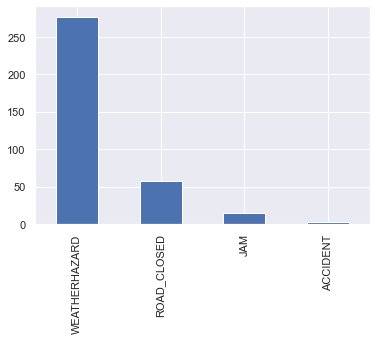

In [7]:
display(alerts['type'].value_counts())
ax = alerts['type'].value_counts().plot.bar()

### Alert Subtypes

HAZARD_ON_ROAD_POT_HOLE               212
ROAD_CLOSED_EVENT                      54
HAZARD_ON_SHOULDER                     23
HAZARD_ON_ROAD_CAR_STOPPED             16
HAZARD_ON_ROAD_CONSTRUCTION            12
                                        8
HAZARD_ON_SHOULDER_CAR_STOPPED          6
JAM_STAND_STILL_TRAFFIC                 6
JAM_HEAVY_TRAFFIC                       5
ROAD_CLOSED_CONSTRUCTION                3
HAZARD_ON_SHOULDER_MISSING_SIGN         3
HAZARD_ON_ROAD_OBJECT                   2
HAZARD_ON_ROAD_TRAFFIC_LIGHT_FAULT      1
ACCIDENT_MINOR                          1
Name: subtype, dtype: int64

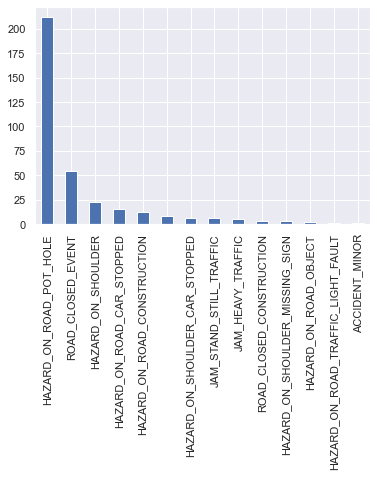

In [8]:
display(alerts['subtype'].value_counts())
ax = alerts['subtype'].value_counts().plot.bar()